In [1]:
import pandas as pd

1. PART 1: Loading and Basic Exploration

In [2]:
#Load the data into a dataframe
df_covid = pd.read_csv("metadata.csv",usecols=['source_x','title','abstract','publish_time','authors','journal'])
df_covid.head()

,source_x,title,abstract,publish_time,authors,journal
0,PMC,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis
1,PMC,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res
2,PMC,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res
3,PMC,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res
4,PMC,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res


In [12]:
#identifies the data types of each column
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   source_x      1056660 non-null  object
 1   title         1056157 non-null  object
 2   abstract      821116 non-null   object
 3   publish_time  1054846 non-null  object
 4   authors       1032791 non-null  object
 5   journal       969338 non-null   object
dtypes: object(6)
memory usage: 48.4+ MB


In [13]:
df_covid.nunique()

source_x            49
title           850366
abstract        730712
publish_time      8056
authors         796659
journal          54993
dtype: int64

In [3]:
#check for number of missing values in each column
df_covid.isnull().sum()

source_x             0
title              503
abstract        235544
publish_time      1814
authors          23869
journal          87322
dtype: int64

In [15]:
#Basic statistics for numerical columns
df_covid.describe()

,source_x,title,abstract,publish_time,authors,journal
count,1056660,1056157,821116,1054846,1032791,969338
unique,49,850366,730712,8056,796659,54993
top,WHO,Reply,[Figure: see text].,2021,"Anonymous,",PLoS One
freq,450459,251,206,233709,3904,9953


2. PART 2: Data Cleaning and Preparation

In [6]:
#Identifies column with many missing values
df_covid.isnull().sum().sort_values(ascending=False)

source_x        0
title           0
abstract        0
publish_time    0
authors         0
journal         0
dtype: int64

In [ ]:
#Handles missing values
df_covid.dropna(inplace=True)

In [ ]:
#save only limited numbers of rows into a dataframe
filtered_df = df_covid.head(1000)

In [ ]:
#Save them as a csv file
filtered_df.to_csv('filtered_df.csv')

In [ ]:
#confirm if they are indeed saved into a csv as specified.
df= pd.read_csv("filtered_df.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   source_x      1000 non-null   object
 2   title         1000 non-null   object
 3   abstract      1000 non-null   object
 4   publish_time  1000 non-null   object
 5   authors       1000 non-null   object
 6   journal       1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [ ]:
#Confirm is all null values are dropped
df_covid.isnull().sum()

source_x        0
title           0
abstract        0
publish_time    0
authors         0
journal         0
dtype: int64

In [35]:
#Convert date column to datetime format
df_covid['publish_time']=df_covid['publish_time'].apply(pd.to_datetime)


In [36]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 737316 entries, 0 to 1056659
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   source_x      737316 non-null  object        
 1   title         737316 non-null  object        
 2   abstract      737316 non-null  object        
 3   publish_time  737316 non-null  datetime64[ns]
 4   authors       737316 non-null  object        
 5   journal       737316 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 39.4+ MB


In [37]:
#Extracting a year from publication date
df_covid['Year'] = df_covid['publish_time'].dt.year

3. PART 3: Data Analysis and Visualization

In [ ]:
df_covid.groupby('Year')[['publish_time']].count()

In [48]:
df_covid['journal'].value_counts(ascending=False)

journal
PLoS One                              9922
bioRxiv                               8960
Int J Environ Res Public Health       8192
Sci Rep                               5829
Cureus                                4195
                                      ... 
Helicases from All Domains of Life       1
Curr Hepat Rep                           1
The Journal of Pathology                 1
Cereal Res Commun                        1
Ann. thorac. cardiovasc. surg            1
Name: count, Length: 49814, dtype: int64

In [49]:
#Find most frequent words in titles (using simple word frequency)
from collections import Counter
import re
#combining all titles into one string
titles = ' '.join(df_covid['title'].astype(str))
#convert to lower and remove pantuations
clean_titles = re.sub(r'[^a-zA-Z\s]','',titles.lower())
#split into indivitual words
words = clean_titles.split()
#count most frequent words
Counter(words).most_common()

[('of', 548682),
 ('and', 412681),
 ('the', 399136),
 ('in', 388734),
 ('covid', 306906),
 ('a', 262606),
 ('for', 150755),
 ('with', 121426),
 ('to', 110634),
 ('on', 95407),
 ('pandemic', 93494),
 ('during', 82193),
 ('patients', 68632),
 ('sarscov', 65346),
 ('study', 62062),
 ('from', 53290),
 ('an', 48019),
 ('health', 45631),
 ('disease', 39365),
 ('coronavirus', 37954),
 ('review', 37720),
 ('infection', 32624),
 ('by', 31390),
 ('analysis', 31140),
 ('impact', 31011),
 ('care', 30425),
 ('clinical', 27912),
 ('among', 26343),
 ('using', 25374),
 ('as', 24557),
 ('case', 23821),
 ('respiratory', 20924),
 ('acute', 19836),
 ('treatment', 19602),
 ('virus', 19397),
 ('risk', 19136),
 ('de', 18232),
 ('systematic', 17540),
 ('management', 17101),
 ('social', 16507),
 ('is', 16417),
 ('learning', 16024),
 ('syndrome', 15793),
 ('use', 15643),
 ('after', 15488),
 ('cancer', 15291),
 ('severe', 15261),
 ('at', 15248),
 ('model', 15145),
 ('role', 15095),
 ('new', 15085),
 ('human', 14

<Axes: xlabel='publish_time'>

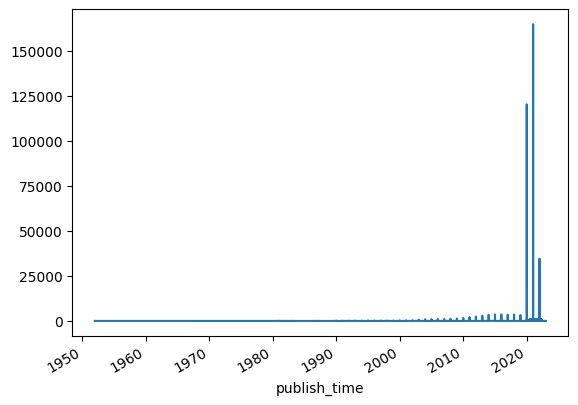

In [56]:
#plot number of publications over time
df_covid.groupby('publish_time').size().plot()

<Axes: xlabel='journal'>

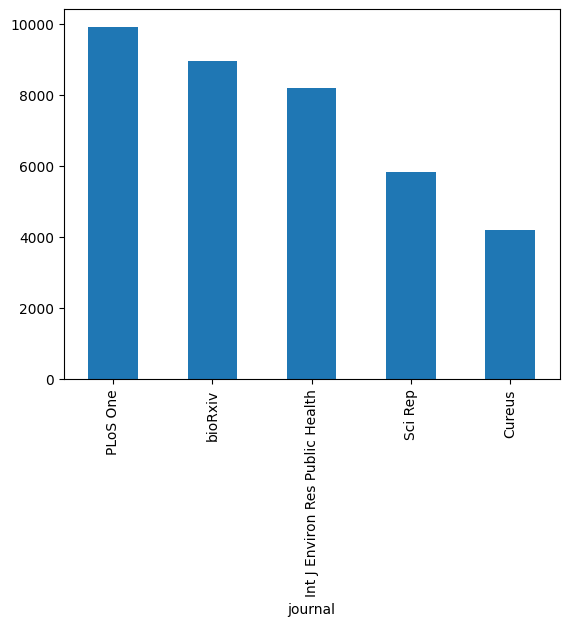

In [57]:
#bar chart of top publishing journals
df_covid['journal'].value_counts().head(5).plot(kind='bar')

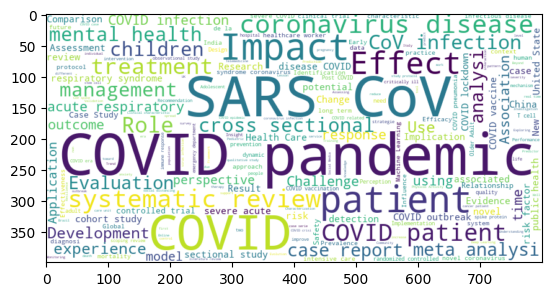

In [61]:
#Generate a word cloud of paper titles
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
).generate(titles)

plt.imshow(wordcloud, interpolation='bilinear')

In [ ]:
#Plot distribution of paper counts by source
df_covid['source'].value_counts().plot(kind='bar')